# Historical Baseball Dashboard

This application is built using Plotly Dash. The app takes historical MLB (Major League Baseball) data and displays team statistics dating from 1903 to 2015. This application and notebook are intended for me to practice the use of the Python language, basic data analysis, and basic data visualization using Dash.

## The Analysis

The applicaiton breaks down each baseballs teams win/loss performance within a range of the teams history. Analysis is done with a multiple CSV files queried with Pandas. Some basic plots are made to work out the statistical analysis/visualization/

## Dependencies (Notebook)

- Pandas 1.1
- matplotlib 3.2.2

## The Data

The data was retrieved from Kaggel and was created by code at https://github.com/benhamner/baseball. It is a processed version of the 2015 data at www.seanlahman.com/baseball-archive/statistics/. The original database was copyright 1996-2015 by Sean Lahman and licensed under a Creative Commons Attribution-ShareAlike 3.0 Unported License. For details see: http://creativecommons.org/licenses/by-sa/3.0/

### *This notebook was used to flesh out the features and conduct basic analysis*

In [1]:
# Import CSV and Pandas libraries
import csv
import pandas as pd

In [2]:
# Read in the data CSV
teams_df = pd.read_csv('team_update.csv')

In [3]:
# Look at the colomn layout and data types
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390 entries, 0 to 2389
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       2390 non-null   int64  
 1   league_id  2390 non-null   object 
 2   team_id    2390 non-null   object 
 3   rank       2390 non-null   int64  
 4   g          2390 non-null   int64  
 5   w          2390 non-null   int64  
 6   l          2390 non-null   int64  
 7   div_win    1260 non-null   object 
 8   wc_win     624 non-null    object 
 9   lg_win     2362 non-null   object 
 10  ws_win     2330 non-null   object 
 11  r          2390 non-null   int64  
 12  ab         2390 non-null   int64  
 13  h          2390 non-null   int64  
 14  double     2390 non-null   int64  
 15  triple     2390 non-null   int64  
 16  hr         2390 non-null   int64  
 17  bb         2390 non-null   int64  
 18  so         2270 non-null   float64
 19  sb         2390 non-null   int64  
 20  cs      

In [4]:
# Look at the dataframe head
teams_df.head()

,year,league_id,team_id,rank,g,w,l,div_win,wc_win,lg_win,...,sv,ha,hra,bba,soa,e,dp,fp,name,park
0,1903,AL,BOS,1,141,91,47,NaN,NaN,Y,...,4,1142,23,269,579,235,86,0.95,Boston Red Sox,Huntington Avenue Grounds
1,1903,NL,BRO,5,139,70,66,NaN,NaN,N,...,4,1276,18,377,438,284,98,0.95,Brooklyn Dodgers,Washington Park III
2,1903,NL,BSN,6,140,58,80,NaN,NaN,N,...,1,1310,30,460,516,351,89,0.93,Boston Braves,South End Grounds III
3,1903,AL,CHA,7,138,60,77,NaN,NaN,N,...,4,1233,23,287,391,297,85,0.94,Chicago White Sox,South Side Park II
4,1903,NL,CHN,3,139,82,56,NaN,NaN,N,...,6,1182,14,354,451,314,78,0.94,Chicago Cubs,West Side Park II


In [5]:
# Function that will create a list of teams based on era
def dynamicera(new,x):
    team_names = teams_df[['year','name','team_id']]
    filter_year = team_names[team_names.year <= new[x][1]]
    filter_year = filter_year[filter_year.year >= new[x][0]]
    filter_team = filter_year['name'].unique()
    filter_team_ids = filter_year['team_id'].unique()
    # Updated, key value pair with team name and team id
    return [{'label': k, 'value': v }for k, v in zip(filter_team, filter_team_ids)]

# list of Era names used here for reference
# era_list = ['Dead Ball','Live Ball','Integration','Expantion','Free Agency','Steroid','Post-Steroid']
# Time list corresponds to the era list
time_list = [(1903,1919),(1920,1941),(1942,1960),(1961,1976),(1977,1993),(1994,2005),(2005,2015)]

# Set list of team names from the 'Integration Era' using the dynamic teams function
teamname = dynamicera(time_list,3)
print(teamname)

[{'label': 'Baltimore Orioles', 'value': 'BAL'}, {'label': 'Boston Red Sox', 'value': 'BOS'}, {'label': 'Chicago White Sox', 'value': 'CHA'}, {'label': 'Chicago Cubs', 'value': 'CHN'}, {'label': 'Cincinnati Reds', 'value': 'CIN'}, {'label': 'Cleveland Indians', 'value': 'CLE'}, {'label': 'Detroit Tigers', 'value': 'DET'}, {'label': 'Kansas City Athletics', 'value': 'KC1'}, {'label': 'Los Angeles Angels', 'value': 'LAA'}, {'label': 'Los Angeles Dodgers', 'value': 'LAN'}, {'label': 'Minnesota Twins', 'value': 'MIN'}, {'label': 'Milwaukee Braves', 'value': 'ML1'}, {'label': 'New York Yankees', 'value': 'NYA'}, {'label': 'Philadelphia Phillies', 'value': 'PHI'}, {'label': 'Pittsburgh Pirates', 'value': 'PIT'}, {'label': 'San Francisco Giants', 'value': 'SFN'}, {'label': 'St. Louis Cardinals', 'value': 'SLN'}, {'label': 'Washington Senators', 'value': 'WS2'}, {'label': 'Houston Astros', 'value': 'HOU'}, {'label': 'New York Mets', 'value': 'NYN'}, {'label': 'Atlanta Braves', 'value': 'ATL'},

In [6]:
# Function that maintains a era range
def dynamicrange(x):
    # Hardcoded list of era time spans
    era_time = [(1903,1919),
                (1920,1941),
                (1942,1960),
                (1961,1976),
                (1977,1993),
                (1994,2005),
                (2006,2015)]
    filter_range = [era_time[x][0],era_time[x][1]]
    return filter_range

# Hardcoded list of era key value pair
era_list = [{'label': 'Dead Ball','value': 'Dead Ball'},{'label': 'Live Ball','value': 'Live Ball'},{'label': 'Integration','value': 'Integration'},{'label': 'Expantion','value': 'Expantion'},{'label': 'Free Agency','value': 'Free Agency'},{'label': 'Steroid','value': 'Steroid'},{'label': 'Post-Steroid','value': 'Post-Steroid'}]

time_list = [(1903,1919),(1920,1941),(1942,1960),(1961,1976),(1977,1993),(1994,2005),(2005,2015)]

era_teams = dynamicera(time_list,5)
year_range = dynamicrange(5)

# Era
print(era_list[5]['value'])
# Era span (Year range)
print(year_range)
# Teams from era
print(era_teams)

Steroid
[1994, 2005]
[{'label': 'Atlanta Braves', 'value': 'ATL'}, {'label': 'Baltimore Orioles', 'value': 'BAL'}, {'label': 'Boston Red Sox', 'value': 'BOS'}, {'label': 'Los Angeles Angels', 'value': 'LAA'}, {'label': 'Chicago White Sox', 'value': 'CHA'}, {'label': 'Chicago Cubs', 'value': 'CHN'}, {'label': 'Cincinnati Reds', 'value': 'CIN'}, {'label': 'Cleveland Indians', 'value': 'CLE'}, {'label': 'Colorado Rockies', 'value': 'COL'}, {'label': 'Detroit Tigers', 'value': 'DET'}, {'label': 'Florida Marlins', 'value': 'FLO'}, {'label': 'Houston Astros', 'value': 'HOU'}, {'label': 'Kansas City Royals', 'value': 'KCA'}, {'label': 'Los Angeles Dodgers', 'value': 'LAN'}, {'label': 'Minnesota Twins', 'value': 'MIN'}, {'label': 'Milwaukee Brewers', 'value': 'ML4'}, {'label': 'Montreal Expos', 'value': 'MON'}, {'label': 'New York Yankees', 'value': 'NYA'}, {'label': 'New York Mets', 'value': 'NYN'}, {'label': 'Oakland Athletics', 'value': 'OAK'}, {'label': 'Philadelphia Phillies', 'value': 'P

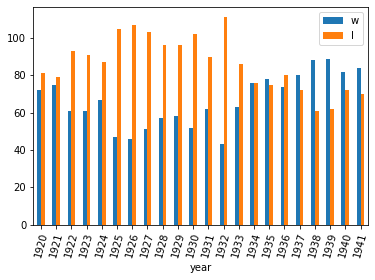

In [6]:
# After selecting Era, Team list is updated along with range
# This filter dataframe represents the range being applied
filter_df = teams_df[(teams_df.year >= 1920)&(teams_df.year <= 1941)]
# This is the plot of the filtered data
filter_df[filter_df.team_id == 'BOS'].plot.bar(x='year',y=['w','l'],rot=75)
# If the above example of features are applied the graph should look similar
# WIN LOSE BAR GRAPH OF THE BOSTON RED SOX DURING THE LIVE BALL ERA

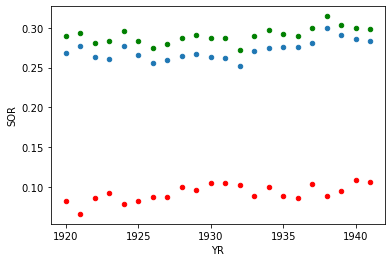

In [7]:
import matplotlib.pyplot as plt

ax = plt.gca()

# BABIP, Batting Avg, Strike Out Rate
# Continuing using the filterd data from above
YR = filter_df[filter_df.team_id == 'BOS'].year
AB = filter_df[filter_df.team_id == 'BOS'].ab
Ht = filter_df[filter_df.team_id == 'BOS'].h
SO = filter_df[filter_df.team_id == 'BOS'].so
BB = filter_df[filter_df.team_id == 'BOS'].bb
HR = filter_df[filter_df.team_id == 'BOS'].hr
SOR = SO / AB
# Calculate BABIP
BABIP = (Ht - HR) / (AB - SO - HR)
# Calculete Batting Average
BAVG = Ht / AB

Data = {'YR': YR,
        'BABIP': BABIP,
        'BAVG': BAVG,
        'SOR': SOR,
       }

df = pd.DataFrame(Data,columns=['YR','BABIP','BAVG','SOR'])
df.plot.scatter(x='YR', y='BABIP',ax=ax,color='green')
df.plot.scatter(x='YR', y='BAVG',ax=ax)
df.plot.scatter(x='YR', y='SOR',ax=ax,color='red')
plt.show()

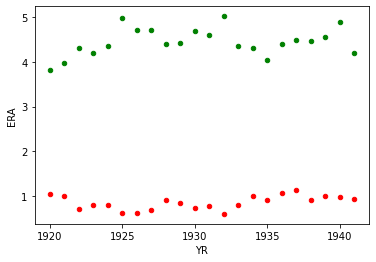

In [8]:
# ERA SOA BBA
ax = plt.gca()

YR = filter_df[filter_df.team_id == 'BOS'].year
ERA = filter_df[filter_df.team_id == 'BOS'].era
SOA = filter_df[filter_df.team_id == 'BOS'].soa
BBA = filter_df[filter_df.team_id == 'BOS'].bba

SBR = SOA / BBA

Data = {'YR': YR,
        'ERA': ERA,
        'SBR': SBR
       }

df = pd.DataFrame(Data,columns=['YR','ERA','SBR'])
# df.plot.scatter(x='YR', y='ERA')
df.plot.scatter(x='YR', y='SBR',ax=ax,color='red')
df.plot.scatter(x='YR', y='ERA',ax=ax,color='green')
plt.show()

In [15]:
team_player = pd.read_csv('player_team.csv')
players_df = pd.read_csv('player.csv')

In [16]:
team_player[team_player.team_id == 'LAA'].head()

,player_id,known_name,team_id,year
40,aasedo01,Don Aase,LAA,1978.0
41,aasedo01,Don Aase,LAA,1979.0
42,aasedo01,Don Aase,LAA,1980.0
43,aasedo01,Don Aase,LAA,1981.0
44,aasedo01,Don Aase,LAA,1982.0


In [17]:
select_team = team_player[team_player.team_id == 'LAA']

select_year = select_team[(select_team.year >= 2000)&(select_team.year <= 2015)]

temp_list = [{'label': k, 'value': v }for k, v in zip(select_year.known_name, select_year.player_id)]

player_list = []

[player_list.append(x) for x in temp_list if x not in player_list]

print(player_list)

[{'label': 'Bobby Abreu', 'value': 'abreubo01'}, {'label': 'Nick Adenhart', 'value': 'adenhni01'}, {'label': 'Cory Aldridge', 'value': 'aldrico01'}, {'label': 'Edgardo Alfonzo', 'value': 'alfoned01'}, {'label': 'Jose Alvarez', 'value': 'alvarjo02'}, {'label': 'Juan Alvarez', 'value': 'alvarju01'}, {'label': 'Alexi Amarista', 'value': 'amarial01'}, {'label': 'Alfredo Amezaga', 'value': 'amezaal01'}, {'label': 'Garret Anderson', 'value': 'anderga01'}, {'label': 'Kevin Appier', 'value': 'appieke01'}, {'label': 'Jose Arredondo', 'value': 'arredjo01'}, {'label': 'Erick Aybar', 'value': 'aybarer01'}, {'label': 'Jett Bandy', 'value': 'bandyje01'}, {'label': 'Larry Barnes', 'value': 'barnela01'}, {'label': 'Justin Baughman', 'value': 'baughju01'}, {'label': 'Gordon Beckham', 'value': 'beckhgo01'}, {'label': 'Cam Bedrosian', 'value': 'bedroca01'}, {'label': 'Tim Belcher', 'value': 'belchti01'}, {'label': 'Clay Bellinger', 'value': 'bellicl01'}, {'label': 'Trevor Bell', 'value': 'belltr01'}, {'l

In [18]:
select_team[select_team.player_id == 'troutmi01']

,player_id,known_name,team_id,year
92520,troutmi01,Mike Trout,LAA,2011.0
92521,troutmi01,Mike Trout,LAA,2012.0
92522,troutmi01,Mike Trout,LAA,2013.0
92523,troutmi01,Mike Trout,LAA,2014.0
92524,troutmi01,Mike Trout,LAA,2015.0


In [19]:
players_df[players_df.player_id == 'troutmi01']

,player_id,birth_year,birth_month,birth_day,birth_country,birth_state,birth_city,death_year,death_month,death_day,...,name_last,name_given,weight,height,bats,throws,debut,final_game,retro_id,bbref_id
17207,troutmi01,1991.0,8.0,7.0,USA,NJ,Vineland,NaN,NaN,NaN,...,Trout,Michael Nelson,235.0,74.0,R,R,2011-07-08,2015-10-04,troum001,troutmi01


In [22]:
# Create dataframe of accolades, New York Yankees from filter_df set to 1920 -1941
Data = filter_df[filter_df.team_id == 'NYA'].drop(columns=['team_id', 'g', 'w', 'l', 'r', 'ab', 'h', 'double', 'triple', 
        'hr', 'bb', 'so', 'sb', 'cs', 'era', 'cg', 'sho', 'sv', 'ha', 'hra', 'bba', 'soa', 'e', 'dp', 
        'fp', 'name', 'park'])

In [21]:
# Set data to variable and check if there was a world series win
WIN = Data[Data.ws_win == 'Y']
# if empty (no World Series win)
if WIN.empty:
    # set data to check if wild card was won
    WIN = Data[Data.wc_win == 'Y']
    # if empty (no Wild Card win)
    if WIN.empty:
        # set data to check if there as a division win
        WIN = Data[Data.div_win == 'Y']

WIN

,year,league_id,rank,div_win,wc_win,lg_win,ws_win
345,1923,AL,1,NaN,NaN,Y,Y
409,1927,AL,1,NaN,NaN,Y,Y
425,1928,AL,1,NaN,NaN,Y,Y
489,1932,AL,1,NaN,NaN,Y,Y
553,1936,AL,1,NaN,NaN,Y,Y
569,1937,AL,1,NaN,NaN,Y,Y
585,1938,AL,1,NaN,NaN,Y,Y
601,1939,AL,1,NaN,NaN,Y,Y
633,1941,AL,1,NaN,NaN,Y,Y
